# Duplicate removal algorithm
Takes in a directory with duplicate image files, copies the unique files to another directory

In [208]:
from pathlib import Path
import math
import json
import os
import shutil
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt

### 1. Process the duplicate file names

In [222]:
dup_path = Path('./top4point3k_no_star_beams')
dup_path.exists()

True

In [223]:
with open('./_labels.json', 'r')as file:
    dict = json.load(file)
for key,value in dict.items():
    if value == 'star_beam':
        os.remove(f'./top4point3k_no_star_beams/{key}')

In [ ]:
dup_names = []
org_file_paths = []
for path in dup_path.iterdir():
    if path.name[-3:] == 'png': 
        org_file_paths.append(str(path)) # add to dict as key
        dup_names.append(str(path.name[14:-4])) # add to dict as value
# sort the dict using values

In [ ]:
dup_names = []
org_file_paths = []

for path in dup_path.iterdir():
    if path.suffix.lower() == ".png":
        org_file_paths.append(str(path))            
        dup_names.append(path.name[14:-4])          


dup_dict = dict(zip(org_file_paths, dup_names))

dup_dict_sorted = dict(sorted(dup_dict.items(), key=lambda item: item[1]))

org_file_paths_sorted = list(dup_dict_sorted.keys())
dup_names_sorted      = list(dup_dict_sorted.values())


### 2. Extract the RA and DEC values of the duplicate images

In [240]:
ra_lst = []
dec_lst = []
for name in dup_names:
    ra_lst.append(int(name[:10]) / 10**7)
    dec_lst.append(int(name[10:]) / 10**7)

### 3. Compute the Euclidean distance between each galaxy objects (ranked)

In [241]:
ra_dif_lst = []
for index, ra in enumerate(ra_lst):
    if index == len(ra_lst) - 1:
        break
    else:
        ra_dif_lst.append(abs(ra_lst[index] - ra_lst[index + 1]))

In [242]:
dec_dif_lst = []
for index, dec in enumerate(dec_lst):
    if index == len(dec_lst) - 1:
        break
    else:
        dec_dif_lst.append(abs(dec_lst[index] - dec_lst[index + 1]))

In [243]:
euc_dis = []
for i in range(len(ra_dif_lst)):
    euc_dis.append(math.sqrt(ra_dif_lst[i]**2 + dec_dif_lst[i]**2))

### 4. Extract the indices of where the small differences occur

In [244]:
count = 0
small_index = []
for i, elem in enumerate(euc_dis):
    if elem < 0.005:
        # print(f'{i}, {elem}')
        count += 1
        small_index.append(i)
        small_index.append(i+1)
small_index = set(small_index)
print(len(small_index))

356


In [245]:
small_index = list(small_index)
small_index.sort()

### 5. Avoid including those with more than 2 duplicates

In [246]:
unique_index = [small_index[0]]
dup_index = []
for i in range(1, len(small_index)):
   if (small_index[i] - small_index[i-1]) == 1:
      dup_index.append(small_index[i])
   else:
      unique_index.append(small_index[i])
len(unique_index)
len(dup_index)

193

In [247]:
all_index = list(range(4311))
all_unique = set(all_index) - set(dup_index)

In [248]:
all_unique = list(all_unique)
all_unique.sort()

### 6. Convert RA and DEC values in matching with their orginal file names

In [153]:
unique_lst = []
for index in all_unique:
    unique_lst.append(str(int(ra_lst[index] * 10**7)) + str(int(dec_lst[index] * 10**7)))

In [159]:
len(set.intersection(set(unique_lst), set(dup_names)))

3656

In [213]:
org_file_paths = []
for path in dup_path.iterdir():
    if path.name[-3:] == 'png':
        org_file_paths.append(str(path))

In [156]:
count = 0
for file in org_file_paths:
    if str(Path(file).name[14:-4]) in unique_lst:
        shutil.copy(file, './uniques')
        count += 1
print(count)

3656


In [158]:
len(set(unique_lst))

4118

In [132]:
dup_lst = []
for index in dup_index:
    dup_lst.append(str(int(ra_lst[index] * 10**7)) + str(int(dec_lst[index] * 10**7)))

In [214]:
count = 0
for file in org_file_paths:
    if str(Path(file).name[14:-4]) in dup_paths:
        shutil.copy(file, './dups')
        os.remove(file)
        count += 1 
print(count)

193


In [163]:
unique_paths = []
dup_paths = []
for index in unique_index:
    unique_paths.append(dup_names[index])
for index in dup_index:
    dup_paths.append(dup_names[index])

In [211]:
dup_paths

['-508975565280317915',
 '-510363299272415391',
 '-510375305272406791',
 '-516559001286493665',
 '-517057907263824311',
 '-518257315265810663',
 '-519633493274252905',
 '-519641257274251194',
 '-520471782290867053',
 '-520791097292457766',
 '-521502217289039279',
 '-522559432273105502',
 '-522665815264927259',
 '-524894428278018246',
 '-527330118300603942',
 '-527577632288799735',
 '-527926213298891522',
 '-528004470269276789',
 '-528018874269569028',
 '-528302215298292618',
 '-528793443276365897',
 '-529760884271850076',
 '-529816842292538634',
 '-530550984262407051',
 '-531773951266911436',
 '-531782867262094267',
 '-531788851262094185',
 '-532987059276316844',
 '-533251142291509670',
 '-535702895269678839',
 '-537882109275632048',
 '-538586151280259068',
 '-544466425288247784',
 '-544707905290336324',
 '-544714689290335871',
 '-546240771286837023',
 '-546242757286832025',
 '-546245791286829440',
 '-546410496281250580',
 '-546415038281259253',
 '-546444999281235556',
 '-5506832792897

In [173]:
org_file_paths = []
for image in Path(dup_path).iterdir():
    org_file_paths.append(str(image))

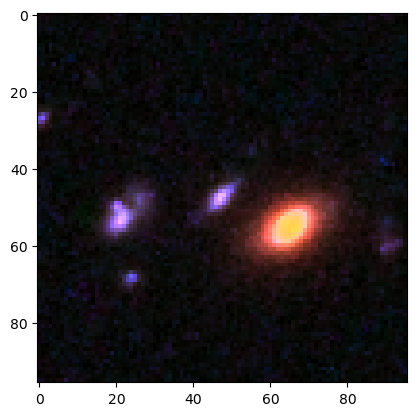

In [175]:
plt.imshow(Image.open(org_file_paths[10]))

In [196]:
np.array(Image.open(org_file_paths[10]))

array([[[15,  9, 12],
        [19,  9, 16],
        [12,  5,  5],
        ...,
        [14, 11,  9],
        [18, 14, 18],
        [10,  9,  7]],

       [[20, 13, 24],
        [14,  7,  9],
        [21, 12, 21],
        ...,
        [ 7,  6,  3],
        [ 5,  5,  1],
        [ 1,  1,  0]],

       [[15, 12, 20],
        [ 9,  7,  6],
        [15, 13, 19],
        ...,
        [ 2,  3,  0],
        [ 6,  8,  4],
        [ 3,  4,  1]],

       ...,

       [[ 3,  2,  0],
        [ 8,  5,  4],
        [14,  9, 13],
        ...,
        [ 7,  5,  4],
        [13, 11, 22],
        [11, 18, 46]],

       [[ 6,  6,  5],
        [10,  7,  9],
        [ 5,  4,  2],
        ...,
        [ 8,  9, 10],
        [ 7,  9, 10],
        [ 6,  9,  8]],

       [[14, 13, 38],
        [15, 10, 23],
        [ 9,  5,  6],
        ...,
        [10, 16, 24],
        [ 8, 13, 14],
        [ 5,  7,  4]]], dtype=uint8)

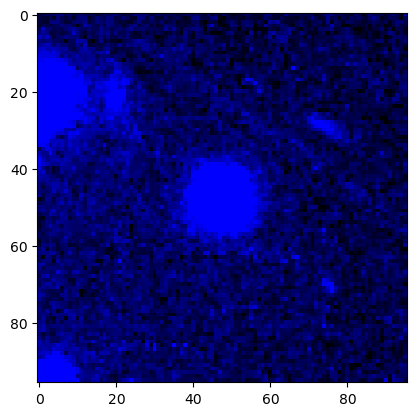

In [176]:
plt.imshow(Image.open('./top4point3k_no_star_beam/TILE102160612_2744438726684024659.png'))

In [218]:
inspect = np.array(Image.open('./top4point3k_no_star_beams/TILE102160612_2744438726684024659.png'))
inspect[:,:,:2]

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

In [189]:
blue = inspect[0][0][:2]

In [190]:
blue

array([0, 0], dtype=uint8)

In [219]:
blue_paths = []
for image in Path(dup_path).iterdir():
    if 'DS_Store' not in str(image):
        img = np.array(Image.open(image))
        if np.sum(img[:,:,:2]) == 0:
            blue_paths.append(image)

In [221]:
for i in range(78):
    os.remove(str(blue_paths[i]))

In [207]:
np.array(Image.open(str(blue_paths[-5])))[0][0]

array([0, 0, 0], dtype=uint8)

In [220]:
len(blue_paths)

78

In [250]:
for path in blue_paths:
    # shutil.copy(path, './blues')
    os.remove(path)

In [251]:
for index in dup_index:
    if Path(org_file_paths_sorted[index]).exists():
        shutil.copy(org_file_paths_sorted[index], 'dups')
        os.remove(org_file_paths_sorted[index])

In [253]:
for file in Path('./4k_for_vote').iterdir():
    if 'DS' in str(file):
        print('DS')
        os.remove(file)